# Avaliando o MNIST Dataset usando MLP do scikit-learn

Importações necessárias para avaliar o dataset.

* numpy - Para interagir com o dataset
* sklearn - Para importar o MultiLayer Perceptron
* matplotlib - Plotar gráficos

In [1]:
%matplotlib inline

import warnings
import random
import json
from timeit import default_timer as timer

import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.datasets.base import get_data_home 
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt



Definindo tamanho (em porcentagem) do Dataset

In [2]:
TRANING_DATASET_SIZE = 0.8
TEST_DATASET_SIZE = 0.2

O código a seguir ignora os warnings (por conta de funções deprecated no scikit-learn que sujam a saida)

Em seguida, baixamos o dataset MNIST original que vai ser salvo na pasta home do sckit-learn

In [3]:

#Ignorando os warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
print('Downloading MNIST data')
print(f"Downloading at: {get_data_home()}")
mnist_dataset = fetch_mldata('MNIST original')
print('Downloaded and loaded!')
    

Downloaded and loaded!


* Separando os dados dos resultados reais (targets)
* Em seguida, de forma randômica, separamos os conjuntos de teste e de treino.

In [4]:
data = mnist_dataset.data
target = mnist_dataset.target

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=TEST_DATASET_SIZE, random_state=42)

print(f"Training dataset size: {len(data_train)}")
print(f"Test dataset size: {len(data_test)}")

Training dataset size: 56000
Test dataset size: 14000


Imprime algumas imagens de exemplo do dataset

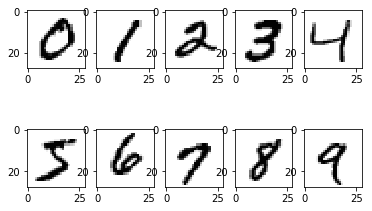

In [5]:
fig, ax = plt.subplots(2,5)
for i, ax in enumerate(ax.flatten()):
    im_idx = np.argwhere(target == i)[0]
    plottable_image = np.reshape(data[im_idx], (28, 28))
    ax.imshow(plottable_image, cmap='gray_r')

Imprime a representação de um dos números do dataset

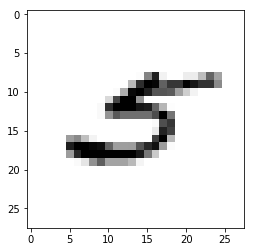

In [6]:
fig, ax = plt.subplots(1)
im_idx = 34567
plottable_image = np.reshape(data[im_idx], (28, 28))
ax.imshow(plottable_image, cmap='gray_r')

Imprime a matriz com os valores da imagem anterior

In [8]:
for index, value in enumerate(data[im_idx]):
    if index % 28 == 0: print("\n")
    print(f"{value} ", end="")



0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 124 221 13 0 0 18 19 66 154 93 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 70 208 254 248 157 200 200 251 230 203 203 117 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 4 81 244 253 223 169 169 163 96 49 12 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 38 185 254 254 106 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 6 208 254 254 254 233 226 152 73 2 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 6 107 165 143 143 143 143 178 254 138 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 175 200 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Para este estudo, gostariamos de testar para diferentes solvers e diferentes tipos de layers.

Os passos então são:
    * Para cada solver
        * Para cada hidden layer
            - Classificamos com o solver e a quantidade de hidden layers
            - Treinamos o classificador
            - Tiramos a acurácia para o conjunto de treino e teste
            - Guardamos estes dados para comparações futuramente.

In [9]:
solvers = ["lbfgs", "sgd", "adam"]
hidden_layers = [(10,10,10,10), (64,64,64,64), (128,128,128,128), (64, 128, 64, 10), (128,128), (64,64)]

datadumps = []

for solver in solvers:
    for hidden_layer in hidden_layers:
    
        start = timer()
        mlp_classifier = MLPClassifier(solver = solver, hidden_layer_sizes=hidden_layer, verbose=True, max_iter=200, alpha=0.0001, tol=1e-4)
        print(f"Fitting model with solver {solver} and iterations {hidden_layer}")
        print("ok")
        mlp_classifier.fit(data_train,target_train)
        print("ok")
        print("Fitting model ended")
        end = timer()
        
        
        training_set_score = mlp_classifier.score(data_train, target_train)
        test_set_score = mlp_classifier.score(data_test, target_test)
        
        datadump = {"Solver": solver, "Hidden Layers" : hidden_layer, "Training set score": training_set_score, "Test set score" : test_set_score, "Time spent": end - start}
        datadumps.append(datadump)




Fitting model with solver lbfgs and iterations (10, 10, 10, 10)
ok
ok
Fitting model ended
Fitting model with solver lbfgs and iterations (64, 64, 64, 64)
ok
ok
Fitting model ended
Fitting model with solver lbfgs and iterations (128, 128, 128, 128)
ok
ok
Fitting model ended
Fitting model with solver lbfgs and iterations (64, 128, 64, 10)
ok
ok
Fitting model ended
Fitting model with solver lbfgs and iterations (128, 128)
ok
ok
Fitting model ended
Fitting model with solver lbfgs and iterations (64, 64)
ok
ok
Fitting model ended
Fitting model with solver sgd and iterations (10, 10, 10, 10)
ok
Iteration 1, loss = 2.44812877
Iteration 2, loss = 2.32197794
Iteration 3, loss = 2.31009356
Iteration 4, loss = 2.30497130
Iteration 5, loss = 2.30277531
Iteration 6, loss = 2.30185141
Iteration 7, loss = 2.30145041
Iteration 8, loss = 2.30128544
Iteration 9, loss = 2.30121268
Iteration 10, loss = 2.30118510
Iteration 11, loss = 2.30117991
Iteration 12, loss = 2.30117141
Iteration 13, loss = 2.301163

Fitting model with solver sgd and iterations (64, 128, 64, 10)
ok
Iteration 1, loss = 2.45829002
Iteration 2, loss = 2.32423836
Iteration 3, loss = 2.31379367
Iteration 4, loss = 2.30816553
Iteration 5, loss = 2.30509339
Iteration 6, loss = 2.30338975
Iteration 7, loss = 2.30243644
Iteration 8, loss = 2.30190431
Iteration 9, loss = 2.30160785
Iteration 10, loss = 2.30143814
Iteration 11, loss = 2.30134290
Iteration 12, loss = 2.30128776
Iteration 13, loss = 2.30125580
Iteration 14, loss = 2.30123955
Iteration 15, loss = 2.30122699
Iteration 16, loss = 2.30122127
Iteration 17, loss = 2.30121908
Iteration 18, loss = 2.30121875
Iteration 19, loss = 2.30121602
Iteration 20, loss = 2.30121588
Iteration 21, loss = 2.30121408
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
ok
Fitting model ended
Fitting model with solver sgd and iterations (128, 128)
ok
Iteration 1, loss = 1.81957147
Iteration 2, loss = 0.85792365
Iteration 3, loss = 0.72157194
Iterat

C:\Users\eduardo.f.lima\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Fitting model with solver sgd and iterations (64, 64)
ok
Iteration 1, loss = 2.28978030
Iteration 2, loss = 1.46500578
Iteration 3, loss = 1.32151890
Iteration 4, loss = 1.18083254
Iteration 5, loss = 1.04636321
Iteration 6, loss = 0.94169688
Iteration 7, loss = 0.80639736
Iteration 8, loss = 0.68511175
Iteration 9, loss = 0.61227201
Iteration 10, loss = 0.56299476
Iteration 11, loss = 0.53104259
Iteration 12, loss = 0.49142336
Iteration 13, loss = 0.46095323
Iteration 14, loss = 0.43590925
Iteration 15, loss = 0.42093609
Iteration 16, loss = 0.40436786
Iteration 17, loss = 0.39271589
Iteration 18, loss = 0.37979571
Iteration 19, loss = 0.36791586
Iteration 20, loss = 0.35889303
Iteration 21, loss = 0.34866383
Iteration 22, loss = 0.34027479
Iteration 23, loss = 0.33034924
Iteration 24, loss = 0.32425558
Iteration 25, loss = 0.31953141
Iteration 26, loss = 0.31324216
Iteration 27, loss = 0.30359757
Iteration 28, loss = 0.29904826
Iteration 29, loss = 0.29243287
Iteration 30, loss = 0.2

C:\Users\eduardo.f.lima\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Fitting model with solver adam and iterations (10, 10, 10, 10)
ok
Iteration 1, loss = 2.48609909
Iteration 2, loss = 1.41607785
Iteration 3, loss = 1.20410569
Iteration 4, loss = 1.10822589
Iteration 5, loss = 1.04012527
Iteration 6, loss = 0.92963433
Iteration 7, loss = 0.83477731
Iteration 8, loss = 0.79015290
Iteration 9, loss = 0.75835935
Iteration 10, loss = 0.74166338
Iteration 11, loss = 0.72807771
Iteration 12, loss = 0.72053679
Iteration 13, loss = 0.70925697
Iteration 14, loss = 0.70043270
Iteration 15, loss = 0.69661981
Iteration 16, loss = 0.69467715
Iteration 17, loss = 0.69284273
Iteration 18, loss = 0.68315982
Iteration 19, loss = 0.68543056
Iteration 20, loss = 0.67528264
Iteration 21, loss = 0.67389060
Iteration 22, loss = 0.67199523
Iteration 23, loss = 0.66188106
Iteration 24, loss = 0.65595325
Iteration 25, loss = 0.65687956
Iteration 26, loss = 0.64553215
Iteration 27, loss = 0.63725383
Iteration 28, loss = 0.63150192
Iteration 29, loss = 0.62039061
Iteration 30, l

C:\Users\eduardo.f.lima\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Fitting model with solver adam and iterations (64, 64, 64, 64)
ok
Iteration 1, loss = 1.36609322
Iteration 2, loss = 0.33403605
Iteration 3, loss = 0.23304179
Iteration 4, loss = 0.18544498
Iteration 5, loss = 0.15233156
Iteration 6, loss = 0.13356892
Iteration 7, loss = 0.11625373
Iteration 8, loss = 0.10217078
Iteration 9, loss = 0.09038102
Iteration 10, loss = 0.09088289
Iteration 11, loss = 0.08012287
Iteration 12, loss = 0.07044674
Iteration 13, loss = 0.07212804
Iteration 14, loss = 0.06400101
Iteration 15, loss = 0.05968334
Iteration 16, loss = 0.07031008
Iteration 17, loss = 0.05727018
Iteration 18, loss = 0.05029766
Iteration 19, loss = 0.05144180
Iteration 20, loss = 0.05317902
Iteration 21, loss = 0.04666968
Iteration 22, loss = 0.04666724
Iteration 23, loss = 0.03945814
Iteration 24, loss = 0.03878117
Iteration 25, loss = 0.04739992
Iteration 26, loss = 0.03577909
Iteration 27, loss = 0.03338570
Iteration 28, loss = 0.03697097
Iteration 29, loss = 0.03657028
Iteration 30, l

Iteration 1, loss = 2.09238592
Iteration 2, loss = 0.60243402
Iteration 3, loss = 0.36299753
Iteration 4, loss = 0.24901498
Iteration 5, loss = 0.18007228
Iteration 6, loss = 0.15637626
Iteration 7, loss = 0.12565556
Iteration 8, loss = 0.11044094
Iteration 9, loss = 0.10223236
Iteration 10, loss = 0.10448215
Iteration 11, loss = 0.09996805
Iteration 12, loss = 0.09341688
Iteration 13, loss = 0.09567240
Iteration 14, loss = 0.08526824
Iteration 15, loss = 0.09812975
Iteration 16, loss = 0.08359309
Iteration 17, loss = 0.07865682
Iteration 18, loss = 0.07275923
Iteration 19, loss = 0.06005434
Iteration 20, loss = 0.09266551
Iteration 21, loss = 0.07258989
Iteration 22, loss = 0.06190848
Iteration 23, loss = 0.05822335
Iteration 24, loss = 0.04393241
Iteration 25, loss = 0.05255934
Iteration 26, loss = 0.05002357
Iteration 27, loss = 0.05513393
Iteration 28, loss = 0.04680780
Iteration 29, loss = 0.06087638
Iteration 30, loss = 0.05244681
Iteration 31, loss = 0.03197184
Iteration 32, los

In [12]:
import json

file = open("results.json","w") 
file.write(json.dumps(datadumps))
file.close()